In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy

### Import LDA document vectors

In [5]:
dv_matrix = np.load('../../processed_files/d2v/webis_d2v_matrix.npy')
df = pickle.load(open("../../processed_files/webis/df.pickle", "rb"))

In [6]:
dv_matrix.shape

(15718, 300)

In [7]:
df.head()

,file_number,file_type,filename,text,paraphrase,text_processed,text_processed_stemmed
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[comte, would, advise, irrational, proceeding,...",[m. comte would not advise so irrational a pro...
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even, comte, would, spurn, irrational, reason...",[even m. comte would spurn such irrational rea...
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture, illustrating, shortest, easiest, way...",[picture illustrating the shortest and easiest...
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[picture, exemplifies, straight, easiest, way,...",[this picture exemplifies the straight and eas...
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, course, bill, going, get, sooner, later...","[thad, of course. and, bill, we're going to ge..."


In [8]:
df.shape

(15718, 7)

In [9]:
type(dv_matrix[0])

numpy.ndarray

In [10]:
np.average(dv_matrix[[0, 1, 2]], axis=0)

array([ 0.06352065,  0.0661083 ,  0.03402719, -0.00493946, -0.10367391,
       -0.00278576,  0.00331914,  0.01816447,  0.03370472,  0.07177192,
       -0.09156556,  0.00202366,  0.00428545, -0.05875976,  0.00693112,
       -0.06257928, -0.0127333 ,  0.02721149, -0.01580001,  0.14353304,
        0.04693119, -0.16800535,  0.02603969,  0.0218543 , -0.01545286,
        0.02628992, -0.00518638,  0.01097994,  0.06966982, -0.03376509,
       -0.03672984, -0.00634623, -0.06468707, -0.01527645,  0.1162084 ,
       -0.0006315 , -0.01155857, -0.03657143, -0.09982628, -0.05462847,
       -0.13124095, -0.1076507 ,  0.01544109,  0.04976383, -0.01511297,
       -0.03190331, -0.00988491,  0.02870619, -0.10839167, -0.04078913,
       -0.06537905,  0.0523584 ,  0.02394366,  0.04999186,  0.05165859,
        0.01380943, -0.01661932, -0.01304805, -0.03894477,  0.04261737,
       -0.11165757,  0.06380782,  0.08610788,  0.00900852,  0.04605825,
        0.07695743,  0.03252497, -0.00622374,  0.03553282, -0.06

## DB Scan

In [11]:
from sklearn.cluster import DBSCAN

In [25]:
# eps (default 0.5): the maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples (default 5): number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself
# algorithm (default 'auto'): ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’
dbscan = DBSCAN(eps = 1, min_samples = 5).fit(dv_matrix)

In [26]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [27]:
num_clusters = max(dbscan.labels_)
num_clusters

84

In [28]:
dbscan

DBSCAN(eps=1)

In [29]:
index_cluster = zip(range(len(dbscan.labels_)), dbscan.labels_)
index_cluster_dict = dict(index_cluster)
index_cluster_dict[1]

-1

In [30]:
cluster_index = list(zip(dbscan.labels_, range(len(dbscan.labels_))))

In [31]:
cluster_list = dict()
for i in range(num_clusters):
    cluster_list[i] = list(filter(lambda row: row[0] == i, cluster_index))

In [32]:
for i in range(num_clusters):
    print('cluster: ', i, 'size: ', len(cluster_list[i]))

cluster:  0 size:  710
cluster:  1 size:  6
cluster:  2 size:  5
cluster:  3 size:  5
cluster:  4 size:  6
cluster:  5 size:  7
cluster:  6 size:  5
cluster:  7 size:  7
cluster:  8 size:  6
cluster:  9 size:  7
cluster:  10 size:  5
cluster:  11 size:  6
cluster:  12 size:  5
cluster:  13 size:  5
cluster:  14 size:  5
cluster:  15 size:  6
cluster:  16 size:  10
cluster:  17 size:  5
cluster:  18 size:  6
cluster:  19 size:  6
cluster:  20 size:  6
cluster:  21 size:  6
cluster:  22 size:  7
cluster:  23 size:  5
cluster:  24 size:  6
cluster:  25 size:  6
cluster:  26 size:  7
cluster:  27 size:  5
cluster:  28 size:  7
cluster:  29 size:  6
cluster:  30 size:  8
cluster:  31 size:  5
cluster:  32 size:  6
cluster:  33 size:  5
cluster:  34 size:  5
cluster:  35 size:  14
cluster:  36 size:  7
cluster:  37 size:  5
cluster:  38 size:  11
cluster:  39 size:  6
cluster:  40 size:  8
cluster:  41 size:  12
cluster:  42 size:  11
cluster:  43 size:  8
cluster:  44 size:  9
cluster:  45 

In [33]:
len(cluster_list)

84

In [34]:
len(cluster_list[0])

710

In [35]:
len(cluster_list[2])

5

In [36]:
len(cluster_list[num_clusters-1])

5

In [37]:
cluster_list[1]

[(1, 134), (1, 135), (1, 138), (1, 139), (1, 140), (1, 141)]

In [38]:
[i[1] for i in cluster_list[0]]

[38,
 40,
 42,
 43,
 70,
 92,
 95,
 109,
 114,
 115,
 149,
 185,
 223,
 224,
 225,
 340,
 341,
 342,
 344,
 433,
 446,
 467,
 479,
 506,
 508,
 514,
 536,
 537,
 557,
 558,
 580,
 618,
 620,
 622,
 623,
 626,
 628,
 629,
 630,
 647,
 668,
 669,
 681,
 710,
 711,
 712,
 713,
 716,
 718,
 722,
 723,
 724,
 726,
 727,
 738,
 740,
 741,
 742,
 743,
 758,
 759,
 761,
 873,
 884,
 886,
 888,
 889,
 894,
 915,
 917,
 933,
 957,
 1007,
 1015,
 1061,
 1125,
 1143,
 1154,
 1156,
 1157,
 1160,
 1162,
 1163,
 1171,
 1175,
 1209,
 1255,
 1275,
 1287,
 1321,
 1335,
 1417,
 1437,
 1487,
 1512,
 1513,
 1535,
 1629,
 1637,
 1747,
 1778,
 1780,
 1781,
 1783,
 1793,
 1802,
 1803,
 1807,
 1813,
 1881,
 1899,
 1909,
 1919,
 1933,
 1961,
 2027,
 2033,
 2043,
 2059,
 2067,
 2112,
 2134,
 2157,
 2161,
 2203,
 2213,
 2235,
 2265,
 2339,
 2355,
 2393,
 2402,
 2403,
 2424,
 2429,
 2439,
 2443,
 2531,
 2558,
 2561,
 2571,
 2580,
 2595,
 2602,
 2603,
 2605,
 2633,
 2677,
 2687,
 2741,
 2757,
 2759,
 2785,
 2828,
 

In [39]:
import statistics

# index is cluster index
def intracluster_similarity(index):
    cluster_centroid = np.average(dv_matrix[[i[1] for i in cluster_list[index]]], axis=0)
    dist_list = []
    cluster = cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-dv_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [40]:
intracluster_similarity(0)

(0.7120799, 0.12474434)

In [41]:
intracluster_similarity(1)

(0.5206514, 0.016529812)

In [42]:
# index is cluster / cluster id
def generate_raw_content_cluster_df(index):
    index_list = cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df.loc[index].to_frame().T
    #cluster_df = df.loc[index_list[1:]]
    cluster_df = df.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

In [43]:
generate_raw_content_cluster_df(0)

,file_number,file_type,filename,text,paraphrase,text_processed,text_processed_stemmed,cluster
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[comte, would, advise, irrational, proceeding,...",[m. comte would not advise so irrational a pro...,0
40,1016,original.txt,1016-original.txt,"The exact number is 42 out of 930. Cf. Douais,...",False,"[exact, number, cf, douais, documents, vol, p,...",[the exact number is 42 out of 930. cf. douais...,0
42,1017,original.txt,1017-original.txt,"The exact number is 42 out of 930. Cf. Douais,...",False,"[exact, number, cf, douais, documents, vol, p,...",[the exact number is 42 out of 930. cf. douais...,0
43,1017,paraphrase.txt,1017-paraphrase.txt,The exact number is 42 out of 930. Cf. Douais...,False,"[exact, number, cf, douais, documents, volipcc...",[the exact number is 42 out of 930. cf. douai...,0
70,103,original.txt,103-original.txt,The subject of the picture is entirely a happy...,False,"[subject, picture, entirely, happy, one, kept,...",[the subject of the picture is entirely a happ...,0
92,104,original.txt,104-original.txt,The subject of the picture is entirely a happy...,True,"[subject, picture, entirely, happy, one, kept,...",[the subject of the picture is entirely a happ...,0
95,1040,paraphrase.txt,1040-paraphrase.txt,A book like Clarissa HArlowe shows his flaring...,True,"[book, like, clarissa, harlowe, shows, flaring...",[a book like clarissa harlowe shows his flarin...,0
109,1047,paraphrase.txt,1047-paraphrase.txt,,False,[],[ ],0
114,105,original.txt,105-original.txt,The subject of the picture is entirely a happy...,False,"[subject, picture, entirely, happy, one, kept,...",[the subject of the picture is entirely a happ...,0
115,105,paraphrase.txt,105-paraphrase.txt,The subject of the picture is entirely a happy...,False,"[subject, picture, entirely, happy, one, kept,...",[the subject of the picture is entirely a happ...,0


In [44]:
avg_list = []
variance_list = []

for i in range(num_clusters):
    avg, variance = intracluster_similarity(i)
    avg_list.append(avg)
    variance_list.append(variance)
    #print()

([<matplotlib.axis.XTick at 0x114668278>,
 <a list of 11 Text xticklabel objects>)

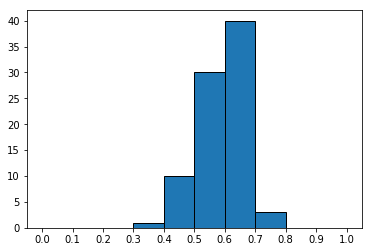

In [45]:
# neighbors = 10
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

## Intercluster Similarity

In [46]:
def intercluster_dist():
    indices = range(num_clusters)
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                cluster_centroid_i = np.average(dv_matrix[[x[1] for x in cluster_list[i]]], axis=0)
                cluster_centroid_j = np.average(dv_matrix[[x[1] for x in cluster_list[j]]], axis=0)
                distance = np.linalg.norm(cluster_centroid_i - cluster_centroid_j)
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

In [47]:
intercluster_distances, values = intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 3.4899824
